<a href="https://colab.research.google.com/github/cabroderick/ML-AM-MQP/blob/main/color_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple color segmentation for AM part scans**

https://realpython.com/python-opencv-color-spaces/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tifffile as tiff
from google.colab import drive
from matplotlib.colors import hsv_to_rgb

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)
flags[40]

NameError: ignored

In [ ]:
drive.mount('/content/drive')
directory = '/content/drive/My Drive/MQP/Trial/H6'

Mounted at /content/drive


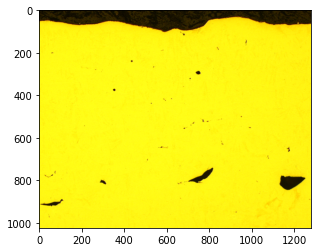

In [ ]:
# load example image
exampleImg = tiff.imread('/content/drive/My Drive/MQP/Trial/H6/A1H6COL_10X_BF_ZUYL_14.tif')
plt.imshow(exampleImg)
plt.show()

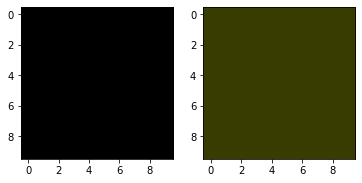

In [ ]:
# set color threshholds and visualize
pure_black = (0, 0, 0)
feature_black = (44, 255, 60)

lo_square = np.full((10, 10, 3), pure_black, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), feature_black, dtype=np.uint8) / 255.0

plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

numpy.ndarray

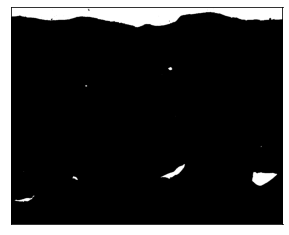

In [ ]:
# apply mask and display results
hsv_img = cv2.cvtColor(exampleImg, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_img, pure_black, feature_black)
result = cv2.bitwise_and(exampleImg, exampleImg, mask=mask)
blur = cv2.GaussianBlur(mask, (7,7), 0)


plt.imshow(mask, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
type(mask)